Для IMDB датасету зробити класифікацію на основі RNN

https://keras.io/api/datasets/imdb/

In [1]:
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.sequence import _remove_long_seq
from keras.utils.data_utils import get_file
from sklearn.model_selection import train_test_split 
from tensorflow.python.platform import tf_logging as logging
from tensorflow.python.util.tf_export import keras_export
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=None,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
)

In [3]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [4]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
X_train.shape

(25000,)

In [6]:
y_train.shape

(25000,)

In [7]:
X_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 10626, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 16873, 19, 861, 1074, 5, 1987, 17975, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 21686, 4

In [8]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

размеры разные, находим максимальный

In [9]:
def get_max_len():
    rev_len = []
    for rev in X_train:
        rev_len.append(len(rev))
    for rev in X_test:
        rev_len.append(len(rev))
    return int(np.ceil(np.max(rev_len)))

In [10]:
get_max_len()

2494

In [11]:
X_train = pad_sequences(X_train, maxlen=2494)

In [12]:
X_test = pad_sequences(X_test, maxlen=2494)

In [13]:
y_train = np.asarray(y_train).astype(np.int)

C:\Users\kolya\AppData\Local\Temp\ipykernel_34224\3515547443.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.asarray(y_train).astype(np.int)


In [14]:
y_test = np.asarray(y_train).astype(np.int)

C:\Users\kolya\AppData\Local\Temp\ipykernel_34224\2093590149.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test = np.asarray(y_train).astype(np.int)


In [15]:
X_train.max()

88586

In [16]:
np.max(X_train)

88586

In [17]:
model = Sequential()
model.add(Embedding(88587, 64))
model.add(LSTM(16))
model.add(Dense(2, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          5669568   
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 2)                 34        
                                                                 
Total params: 5,674,786
Trainable params: 5,674,786
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
history = model.fit(X_train, 
                    y_train,
                    epochs=10,
                    batch_size=256,
                    validation_split=0.1)

Epoch 1/10
88/88 [==============================] - 253s 3s/step - loss: 0.6309 - accuracy: 0.6472 - val_loss: 0.4834 - val_accuracy: 0.7920
Epoch 2/10
88/88 [==============================] - 253s 3s/step - loss: 0.4042 - accuracy: 0.8301 - val_loss: 0.3438 - val_accuracy: 0.8592
Epoch 3/10
88/88 [==============================] - 268s 3s/step - loss: 0.2973 - accuracy: 0.8818 - val_loss: 0.3802 - val_accuracy: 0.8400
Epoch 4/10
88/88 [==============================] - 255s 3s/step - loss: 0.2395 - accuracy: 0.9108 - val_loss: 0.3542 - val_accuracy: 0.8564
Epoch 5/10
88/88 [==============================] - 281s 3s/step - loss: 0.1951 - accuracy: 0.9278 - val_loss: 0.3265 - val_accuracy: 0.8780
Epoch 6/10
88/88 [==============================] - 271s 3s/step - loss: 0.1641 - accuracy: 0.9416 - val_loss: 0.3067 - val_accuracy: 0.8868
Epoch 7/10
88/88 [==============================] - 269s 3s/step - loss: 0.1409 - accuracy: 0.9516 - val_loss: 0.3080 - val_accuracy: 0.8812
Epoch 8/10
88

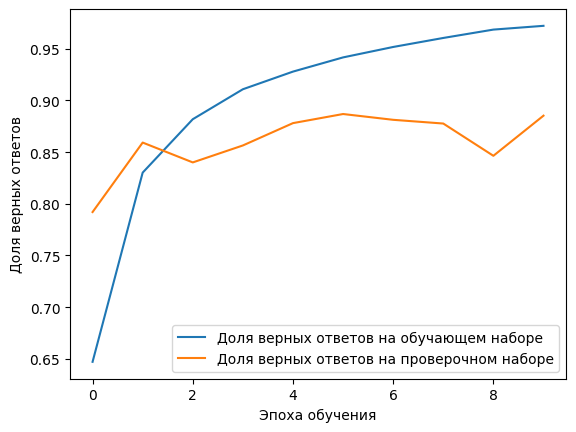

In [21]:

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [22]:
y_predict = model.predict(X_test)

782/782 [==============================] - 122s 156ms/step


In [ ]:
accuracy_score(y_test, y_predict)

модель обучается долго, видно по графику что после 5й эпохи скорее всего начинается чрезмерное обучение модели, можно оставить 5 эпох. в целом результаты модели довольно хорошие